# IBM HR attrition project

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies.


Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment.
HR analytics aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

In this project we aim to deduce -

1. How does Attrition affect companies?
2. How does HR Analytics help in analyzing attrition?

In [1932]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [1933]:
#Loading data from csv file

hr_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [1934]:
#First glance at the data

hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Observation -

Our dataset contains of 1470 rows and 35 columns.

In [1935]:
#Checking a random data sample

hr_data.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
794,34,No,Travel_Frequently,618,Research & Development,3,1,Life Sciences,1,1103,1,Male,45,3,2,Healthcare Representative,4,Single,7756,22266,0,Y,No,17,3,3,80,0,7,1,2,6,2,0,4
1233,30,No,Travel_Rarely,793,Research & Development,16,1,Life Sciences,1,1729,2,Male,33,3,1,Research Scientist,4,Married,2862,3811,1,Y,No,12,3,2,80,1,10,2,2,10,0,0,8
364,37,No,Travel_Rarely,921,Research & Development,10,3,Medical,1,486,3,Female,98,3,1,Laboratory Technician,1,Married,3452,17663,6,Y,No,20,4,2,80,1,17,3,3,5,4,0,3
547,42,Yes,Travel_Frequently,933,Research & Development,19,3,Medical,1,752,3,Male,57,4,1,Research Scientist,3,Divorced,2759,20366,6,Y,Yes,12,3,4,80,0,7,2,3,2,2,2,2
535,41,No,Travel_Rarely,427,Human Resources,10,4,Human Resources,1,731,2,Male,73,2,5,Manager,4,Divorced,19141,8861,3,Y,No,15,3,2,80,3,23,2,2,21,6,12,6


# Exploratory Data Analysis

We will start analysing the data and perform Exploratory Data Analysis on it.

In [1936]:
#Checking the data information -

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations -

- The data consists of 35 total columns.
- There are 9 categorical columns and rest are numeric columns.
- There are total 1470 values for each column.
- The target variable is 'Attrition' which is categorical in nature (Yes/No values)

We will be using classification models for predictions.

In [1937]:
#Checking for null values in the data -

hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation -

The data does not contain any null values.

In [1938]:
#Checking data statistics using the describe command. We will use set_option command to display all the columns, since the dataset is large and the columns do not get completely displayed directly.

pd.set_option('display.max_columns', None)
hr_data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations -

- The data is scattered between the age group 18 - 60, which is the standard working age group.
- Daily minimum rate starts from 102 and ends at 1499.
- Minimum distance from home is 1 and maximum is 29.
- Education has numeric values between 1 to 5.
- Employee Number is the employee identifier, which should be unique per employe, and hence will not contribute to model learning.
- Employee satisfaction score ranges between 1 to 4.
- Hourly rate ranges between 30 to 100.
- JobInvolvement ranges between 1 - 4.
- Job Level ranges between 1-5.
- Job satisfaction ranges between 1- 4.
- Monthly income ranges between 1009 and 19999.
- Monthly rate starts from 2094 and ends at 26999.
- Number of companies worked has a minimum range of 0 and maximum of 9.
- Percent salary hikes are between 11 - 25%.
- Performance rating has only 2 types of values, 3 and 4.
- Relationship status has a range between 1 - 4.
- Standard hours has only 1 value - 80.
- Stock Option level has values 1 and 3.
- Total working years has a range of 0 - 40.
- Training time last year ranges between 0 and 6.
- Work life balance has a range from 1 to 4.
- Years at company is between 0 - 40.
- Years in current role has a range 0 - 18.
- Years in last promotion has a range 0 - 15.
- Years with current manager has a range 0 - 17.

In [1939]:
#Analysing the columns which appear to be adding no value to model learning.

#Checking EmployeeCount variable
hr_data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

The column has only 1 value - '1'. 

In [1940]:
#Checking Employee Number column

len(hr_data.EmployeeNumber.unique())

1470

All the values in EmployeeNumber are unique, hence no contribution to model learning.

In [1941]:
#Checking Standard Hours column

hr_data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

The column has only 1 value - '80', thereby not adding any value to model learning

In [1942]:
#Dropping the above variables to decrease dimensionality.

hr_data.drop(['EmployeeCount','EmployeeNumber','StandardHours'], axis = 'columns', inplace = True)

In [1943]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

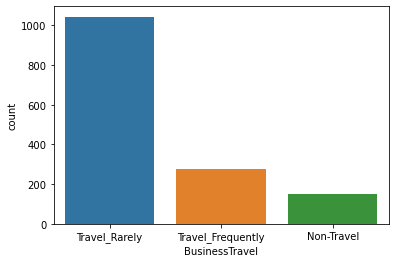

In [1944]:
#Analysing the categorical columns now

#Analysing the BusinessTravel column
sns.countplot(hr_data.BusinessTravel)
hr_data.BusinessTravel.value_counts()

Observation -

- There are 3 types of values in this column - 'Travel Rarely', 'Travel Frequently' and 'Non-Travel'.
- The 'Travel Rarely' category has the highest count - 1043.
- Non-travellers are the lowest with a count of 150.
- Travel frequently category people are still low as compared to Travel Rarely - 277. 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

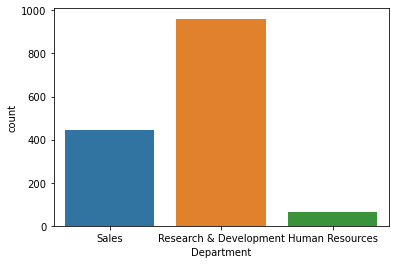

In [1945]:
#Analysing the Department column
sns.countplot(hr_data.Department)
hr_data.Department.value_counts()

Observations -

Department has 3 different values - Sales, Research and Development and Human Resources.

- The highest number of employees are from R&D department - 961.
- Sales department has 446 number of employes
- HR department has only 63 employees as per the given dataset.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

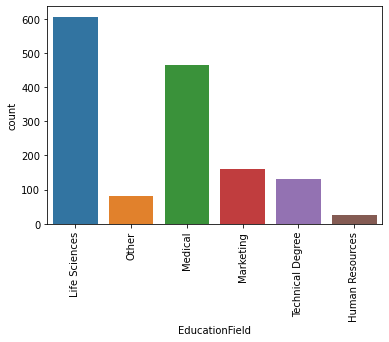

In [1946]:
#Analysing the Education Field column
sns.countplot(hr_data.EducationField)
plt.xticks(rotation = 90)
hr_data.EducationField.value_counts()


Observations -

There are 6 categories in Education Field column -

- Life Sciences - Highest rows with a count of 606
- Medical - 464 rows
- Marketing - 159 rows
- Technical degree - 132 rows
- Other - 82 rows
- Human Resources - 27 rows.

The difference amongst these fields are quite high.

Male      882
Female    588
Name: Gender, dtype: int64

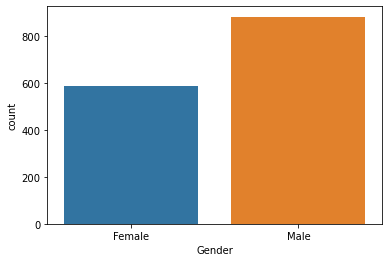

In [1947]:
#Analysing the Gender column
sns.countplot(hr_data.Gender)
hr_data.Gender.value_counts()

Observations -

2 categories for the gender column

- Males have a count of 882 
- Females have a count of 588.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

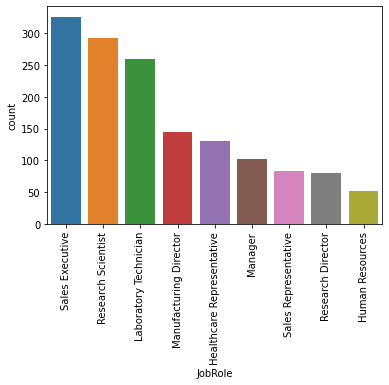

In [1948]:
#Analysing the Job role column
sns.countplot(hr_data.JobRole)
plt.xticks(rotation = 90)
hr_data.JobRole.value_counts()

Observations -

There are 9 different categories for JobRole column.

The highest count lies for the Sales Executive column and the lowest is in HR role.

- Sales Executive             - 326 rows
- Research Scientist          - 292 rows
- Laboratory Technician       - 259 rows
- Manufacturing Director      - 145 rows
- Healthcare Representative   - 131 rows
- Manager                     - 102 rows
- Sales Representative        -  83 rows
- Research Director           -  80 rows
- Human Resources             -  52 rows

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

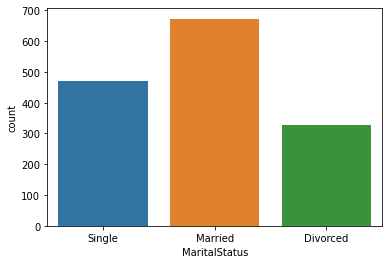

In [1949]:
#Analysing the Marital Status column
sns.countplot(hr_data.MaritalStatus)
hr_data.MaritalStatus.value_counts()

Observation -

- There are 3 categories for this field -

- Single - 470 rows
- Married - 673 rows
- Divorced - 327 rows

Married people are maximum in number and Divorced are comparitively lesser.

In [1950]:
#Analysing the Over 18 column. Since the Min age is 18, this column should have only 'Y' values.

hr_data.Over18.value_counts()


Y    1470
Name: Over18, dtype: int64

Observation - As expected, this column has only 1 value and can be dropped since this does not add any value to model learning.

In [1951]:
hr_data.drop('Over18', axis = 'columns', inplace = True)

In [1952]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


No     1054
Yes     416
Name: OverTime, dtype: int64

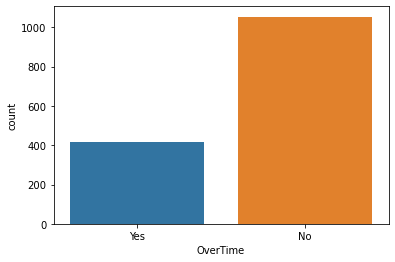

In [1953]:
#Analysing the Overtime column
sns.countplot(hr_data.OverTime)
hr_data.OverTime.value_counts()

Observation -

There are 416 people who do overtime and 1054 who dont.
Overtime should impact Employee Attrition since overtime leads to unsatisfaction in job.

In [1954]:
corr = hr_data.corr()

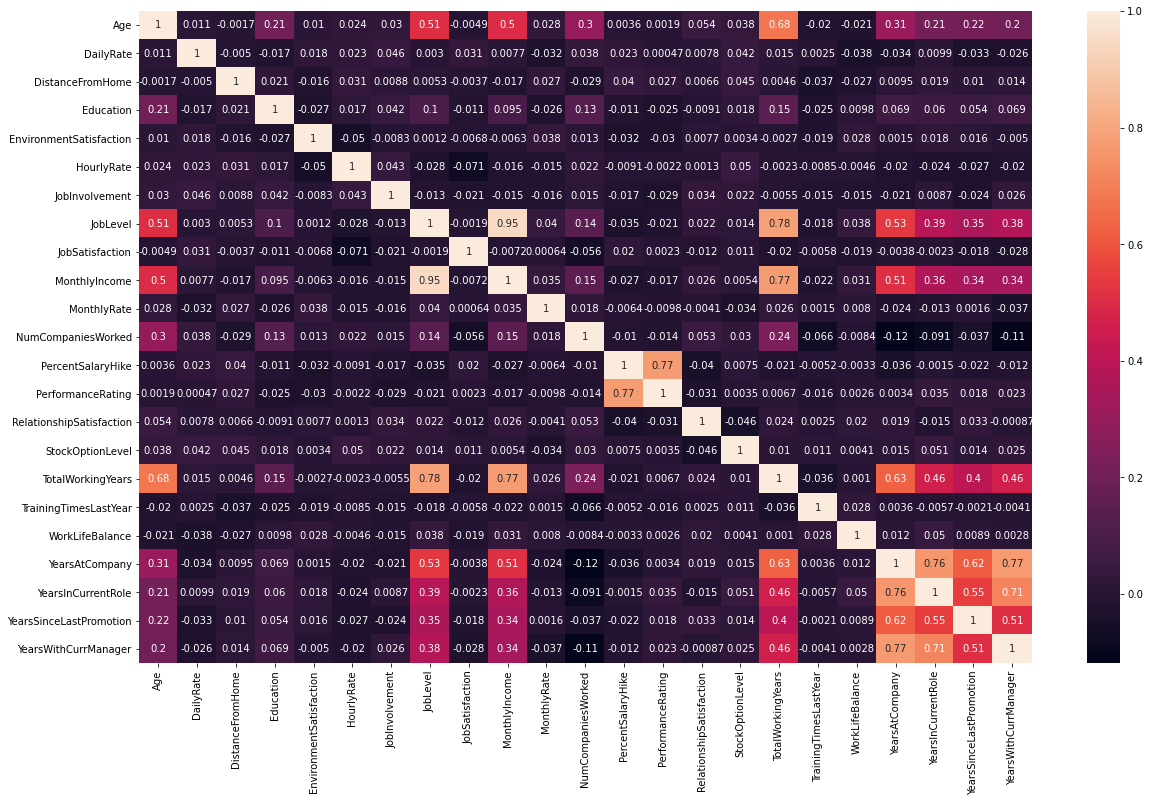

In [1955]:
plt.figure(figsize = (20,12))
sns.heatmap(corr, annot = True)

Following are the interdependent relations identified from the above heatmap -

- Years at company, year in current role are related to years with current manager (77 and 71%)
- Years since last promotion is moderately related to years wit current manager (51%)
- Years at comapny is related with job level by 53%
- Years with company is correlated with total working years.
- Total working years is correlated with monthly income and job level (78 and 77%)
- Job level is highly correlated with monthly income (95%)
- Job level is related with total working years 78%
- Percent Hike is dependent on Performance rating (77%)


In [1956]:
#Changing the values Yes/No to 1/0 to analyse the correlation with various features -

hr_data['Attrition'].replace('Yes',1, inplace = True)
hr_data['Attrition'].replace('No',0, inplace = True)

In [1957]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


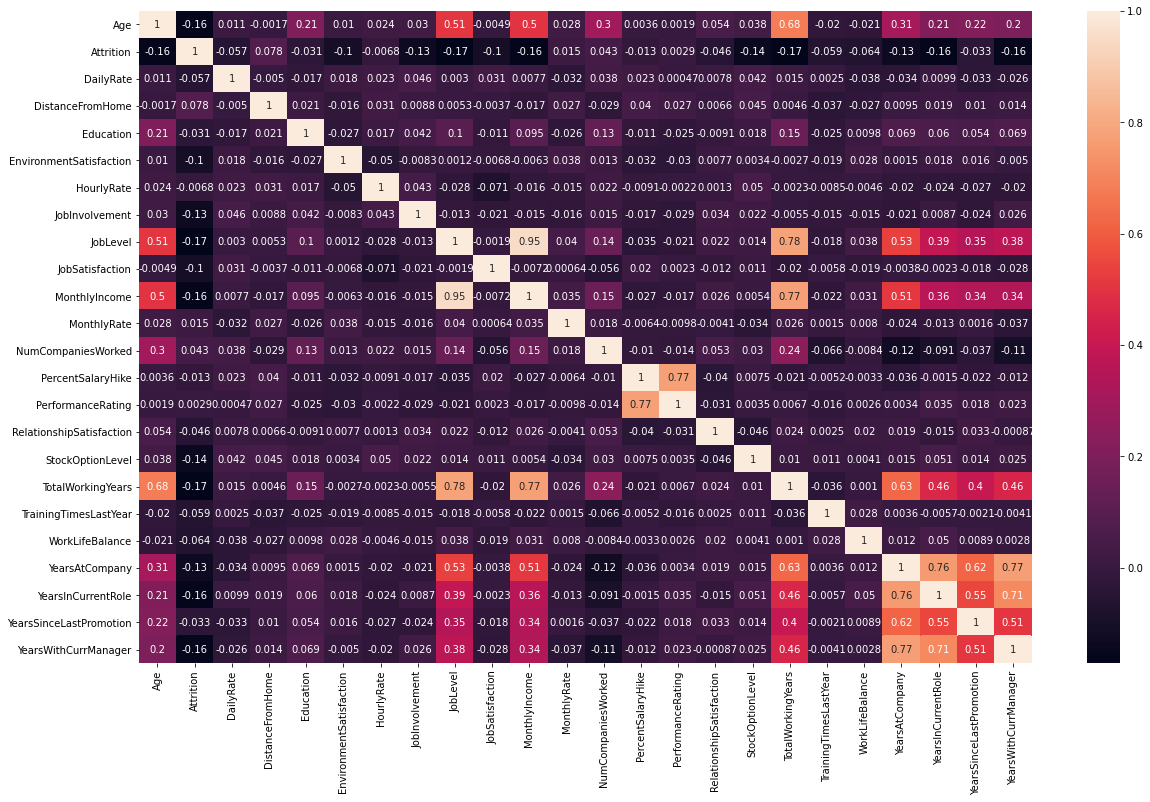

In [1958]:
#Plotting the heatmap again -

corr =  hr_data.corr()
plt.figure(figsize = (20,12))
sns.heatmap(corr, annot = True)

Attrition is moderately correlated with Age, joblevel, monthlyincome, Total working years, Years in current role and years with current manager.

Rest of the correlations are present but are comparitily lesser.

0    1233
1     237
Name: Attrition, dtype: int64

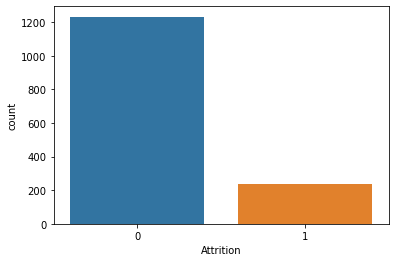

In [1959]:
#Analysing the Attrition variable, and comparing it with other factors

sns.countplot(hr_data.Attrition)
hr_data.Attrition.value_counts()

Observation - Attrition value 'Yes' is quite less compared to 'No'.

([<matplotlib.patches.Wedge at 0x22c572ea040>,
 [Text(-0.9618916732177651, 0.5336332157899547, '0'),
  Text(0.961891673217765, -0.5336332157899547, '1')])

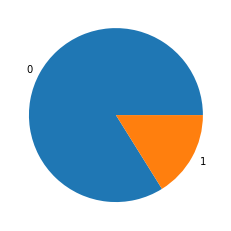

In [1960]:
plt.pie(hr_data.Attrition.value_counts(), labels = [0,1])

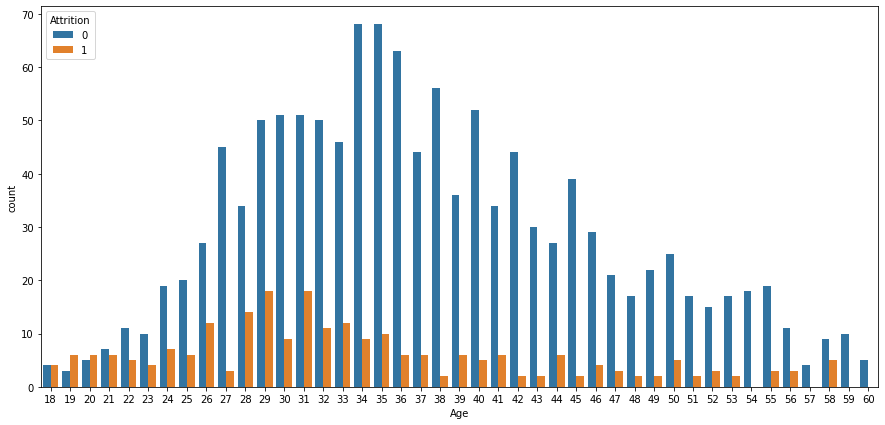

In [1961]:
#Comparing Attrition with Age

plt.figure(figsize = (15,7))
sns.countplot(hr_data.Age,hue = hr_data.Attrition)

Observation -

- Attrition value decreases as the age increases.
- Highest Attrition is observed in the age grup 28-35.

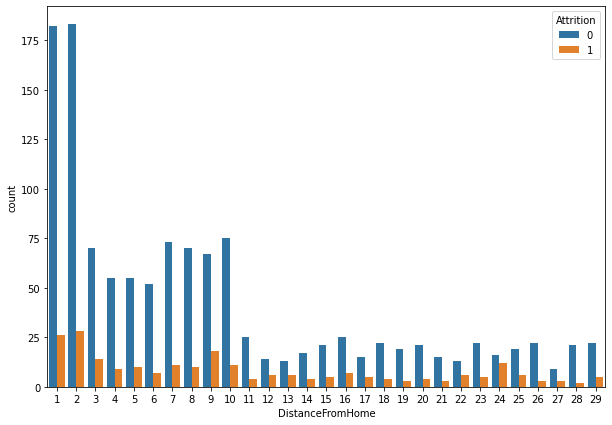

In [1962]:
#Comparing Attrition with Distance from work

plt.figure(figsize = (10,7))
sns.countplot(hr_data.DistanceFromHome,hue = hr_data.Attrition)

Observation -

As the distance from Home increases, attrition value decreases but has a slight change after 11.

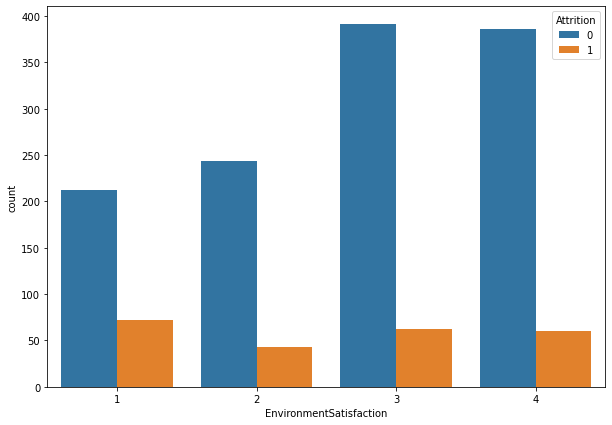

In [1963]:
#Comparing Attrition with Environment Sartisfaction

plt.figure(figsize = (10,7))
sns.countplot(hr_data.EnvironmentSatisfaction,hue = hr_data.Attrition)

Observations - 

No specific impact is observed on attrition rate with increase/decrease in encironment satisfaction.

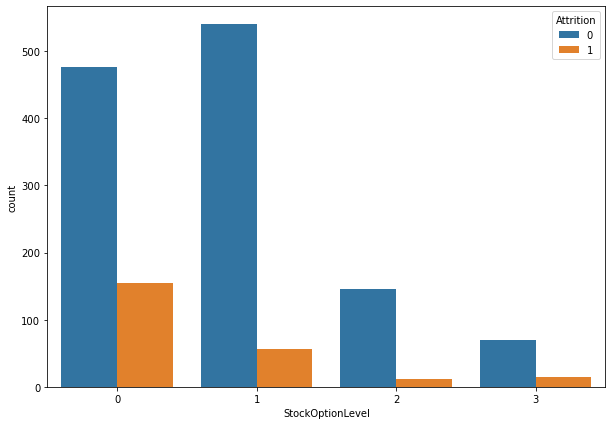

In [1964]:
#Comparing Attrition with StockOptionLevel

plt.figure(figsize = (10,7))
sns.countplot(hr_data.StockOptionLevel,hue = hr_data.Attrition)


Observation - As stock option level increases, Attrition decreases.

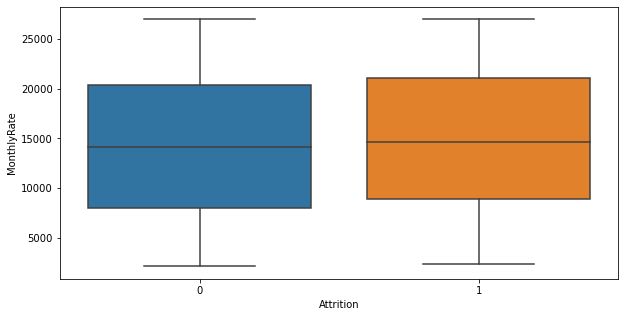

In [1965]:
#Comparing monthly rates with Attrition

plt.figure(figsize=(10 , 5))
sns.boxplot(y = 'MonthlyRate' , x='Attrition' , data=hr_data)

Monthly rates are not specifically impacting attrition quite much

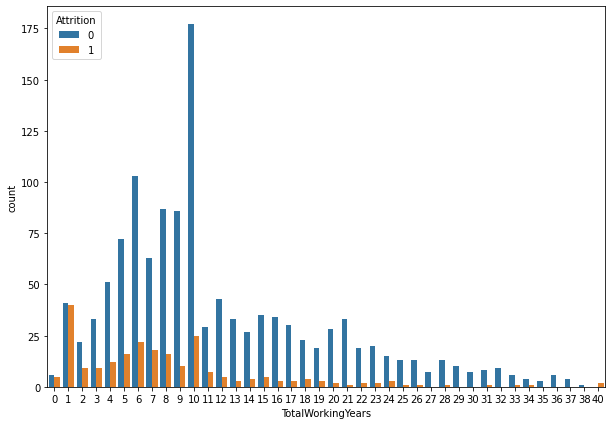

In [1966]:
#Comparing Attrition with Total working years

plt.figure(figsize = (10,7))
sns.countplot(hr_data.TotalWorkingYears,hue = hr_data.Attrition)


Observation - 

As total number of working year increases, attrition decreases.
Attrition is highest in 1 year experience category and increases between 5 to 10.

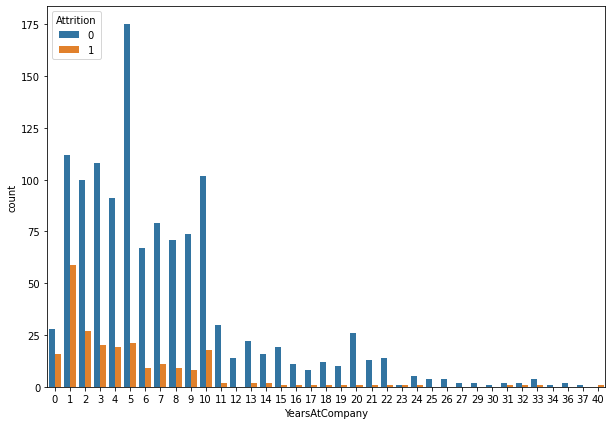

In [1967]:
#Comparing Attrition with Years At company

plt.figure(figsize = (10,7))
sns.countplot(hr_data.YearsAtCompany,hue = hr_data.Attrition)

Observation -

As years in company increase, attrition decreases.
Attrition is highest with 1 year experience in company.

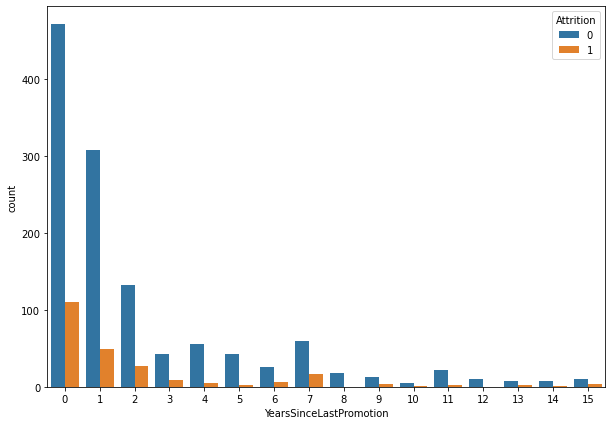

In [1968]:
#Comparing Attrition with years since last promotion

plt.figure(figsize = (10,7))
sns.countplot(hr_data.YearsSinceLastPromotion,hue = hr_data.Attrition)

Observation - 

As years since last promotion increases, attrition decreases.


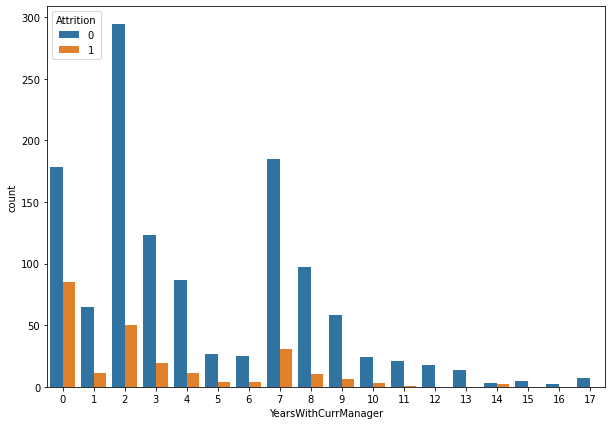

In [1969]:
#Comparing Attrition with years with current manager

plt.figure(figsize = (10,7))
sns.countplot(hr_data.YearsWithCurrManager,hue = hr_data.Attrition)

Observation -

As the years with current manager increase, attrition decreases.
Many people tend to leave when the experience under current manager is 0 years.

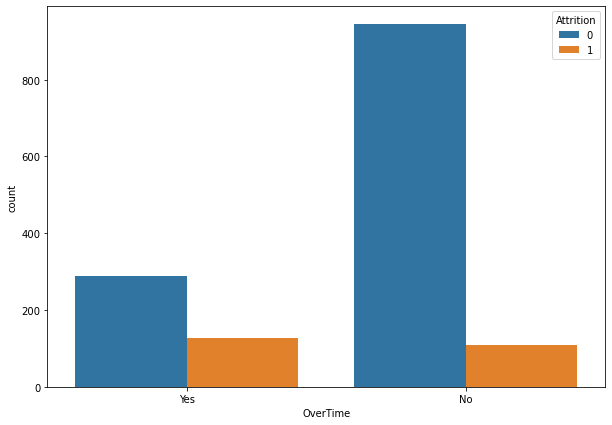

In [1970]:
#Comparing Attrition with Overtime

plt.figure(figsize = (10,7))
sns.countplot(hr_data.OverTime,hue = hr_data.Attrition)

Observation -

People with no Overtime have a slightly lower attrition rate than the overtiming ones.

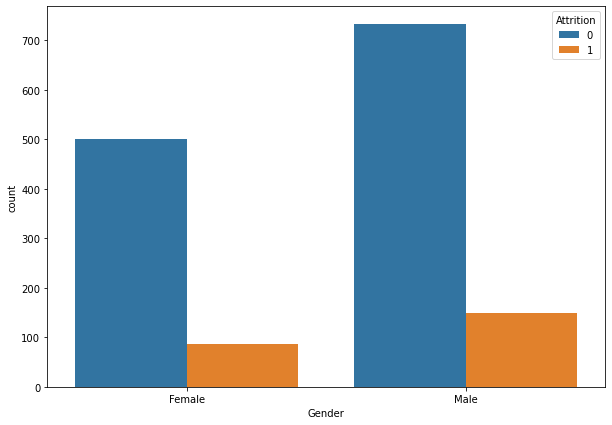

In [1971]:
#Comparing Attrition with Gender

plt.figure(figsize = (10,7))
sns.countplot(hr_data.Gender,hue = hr_data.Attrition)

Observation -

Males have a visibly higher attrition rate than the females.

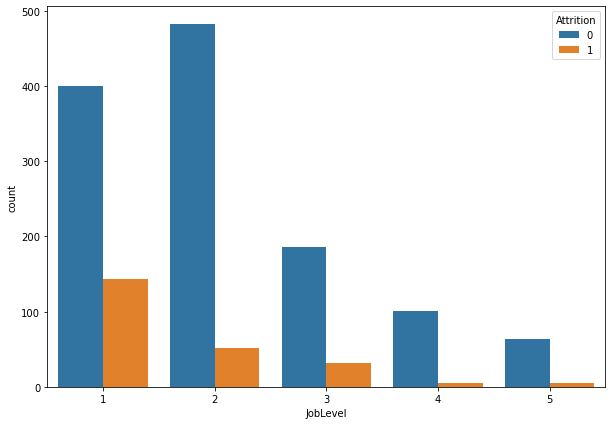

In [1972]:
#Comparing Attrition with Joblevel

plt.figure(figsize = (10,7))
sns.countplot(hr_data.JobLevel,hue = hr_data.Attrition)

Observation -

As job level increases, Attrition decreases.

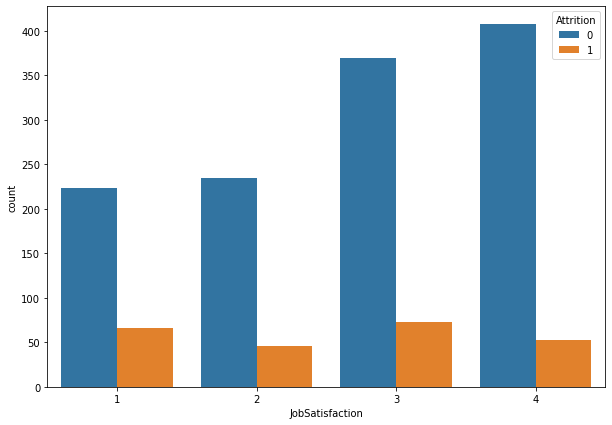

In [1973]:
#Comparing Attrition with Job satisfaction
plt.figure(figsize = (10,7))
sns.countplot(hr_data.JobSatisfaction,hue = hr_data.Attrition)

Observation - 

Attrition is not dependent on job satisfaction

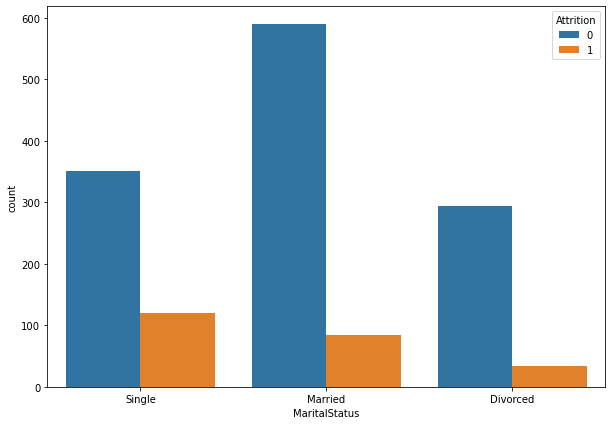

In [1974]:
#Comparing Attrition with Marital status

plt.figure(figsize = (10,7))
sns.countplot(hr_data.MaritalStatus,hue = hr_data.Attrition)

Observation -

Attrition level is highest in singles, and is lowest in divorced people.

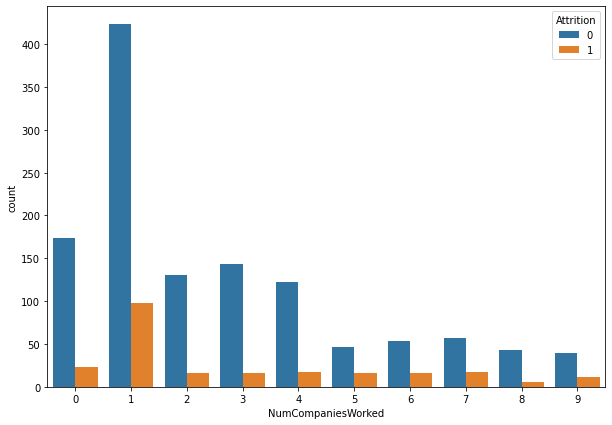

In [1975]:
#Comparing Attrition with NumCompanies worked

plt.figure(figsize = (10,7))
sns.countplot(hr_data.NumCompaniesWorked,hue = hr_data.Attrition)

Observations - 

No specific pattern is observed if we check NumCompaniesWorked in relation to Attrition. The attrition is highest where numcompaniesworked is 1

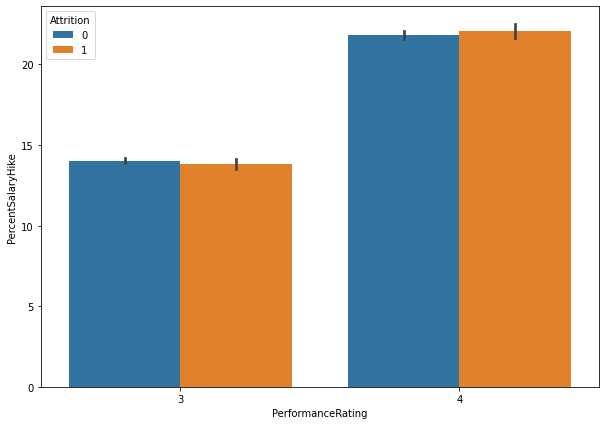

In [1976]:
#Comparing Performance ranking and Percentage hike

plt.figure(figsize = (10,7))
sns.barplot(x=hr_data['PerformanceRating'],y=hr_data['PercentSalaryHike'], hue = hr_data.Attrition)

Observations -

PercentSalaryHike depends on the PerformanceRating. But has no specific impact on Attrition.

Conclusion of the EDA -
----------------------------------

Attrition depends on -

- Gender
- Years with Current Manager
- Total working years
- Years in current company
- Years since last promotion
- Stock Option level
- Age
- Job Level
- Marital Status

# Data Modeling 

We will be checking for outliers and removing skewness in this step.

We do not need to fill/replace missing values since we dont have missing values in our dataset.

### Outlier detection

Detecting outliers by plotting boxplot

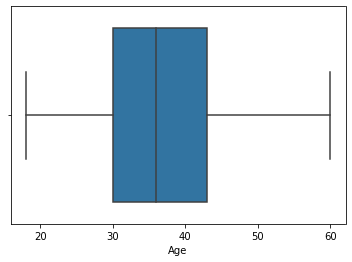

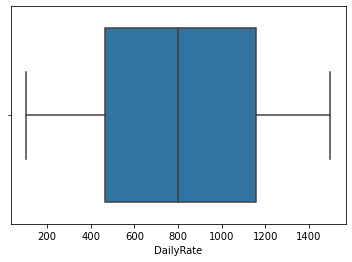

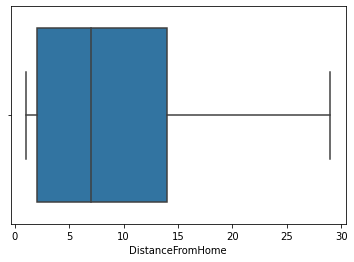

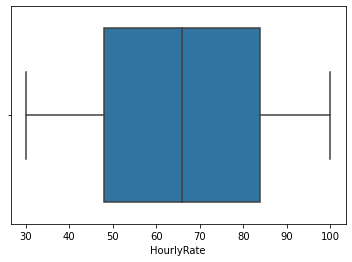

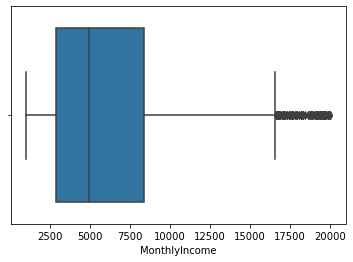

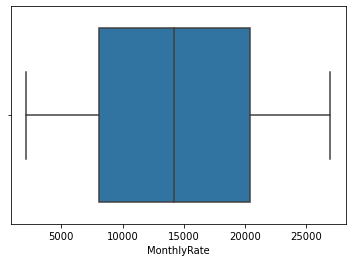

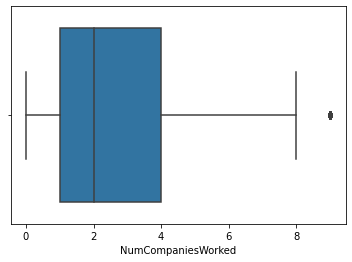

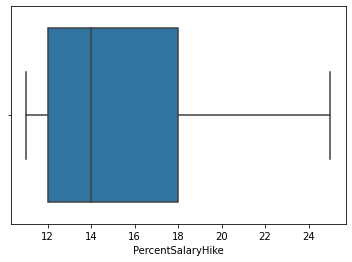

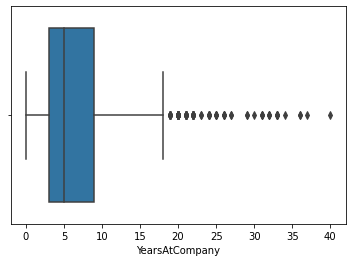

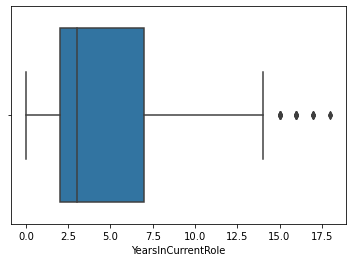

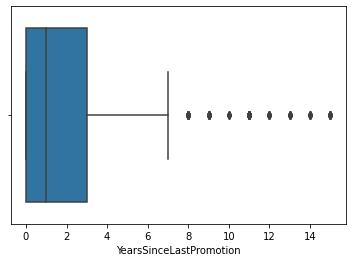

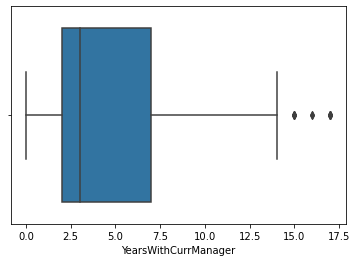

In [1977]:
numerical_data = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in numerical_data:
    sns.boxplot(hr_data[i])
    plt.show()

Outliers can be observed in -

- Monthly Income
- NumCompaniesWorked
- Years at company
- Years in current role
- Years since last promotion
- Years with current Manager

We have observed relation between these variables and attrition.
For majority of these columns, as the value increases, attrition decreases.

We create 2 different dataframes, one with outliers and one without outliers, and check model performance for both types of data to check how model performs.

In [1978]:
#Importing zscore method

from scipy.stats import zscore

In [1979]:
zs = zscore(hr_data[numerical_data])

In [1980]:
zs

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [1981]:
hr_data_without_outliers = hr_data[((abs(zs)<3).all(axis=1))]

In [1982]:
hr_data_without_outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [1983]:
outlier = hr_data[((abs(zs)<3).all(axis=1))==False] # Data values with outliers

In [1984]:
outlier['Attrition'].value_counts()

0    66
1     8
Name: Attrition, dtype: int64

We have now removed the rows which contain outliers and created a dataframe hr_data_without_outliers to check model results.

### Skewness removal

In [1985]:
hr_data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Following columns need to be treated for skewness, considering the threshold value as 0.5-0.6 -

- DistanceFromHome
- Monthly Income
- NumCompaniesWorked
- PercentSalaryHike
- Total working years
- Years at company
- Years since last promotion
- Years with current manager


Following data is ordinal in nature and hence we will not remove skewness from these -
- JobLevel
- Performance rating
- StockOptionLevel
- WorkLifeBalance

In [1986]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [1987]:
hr_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [1988]:
#Transforming data using sqrt method -

for i in ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsInCurrentRole', 'YearsWithCurrManager']:
    hr_data[i]=np.sqrt(hr_data[i])

In [1989]:
hr_data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion     0.739126
YearsWithCurrManager       -0.254611
dtype: float64

In [1990]:
#Applying sqrt method again to MonthlyIncome, PercentSalaryHike and YearsSinceLastPromotion

for i in ['MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion']:
    hr_data[i]=np.sqrt(hr_data[i])

In [1991]:
hr_data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.581938
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.574371
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion    -0.052529
YearsWithCurrManager       -0.254611
dtype: float64

The skewness is now successfully removed from our data with outliers, checking the same for data without outliers.

In [1992]:
hr_data_without_outliers.skew()

Age                         0.471805
Attrition                   1.816422
DailyRate                  -0.014303
DistanceFromHome            0.952837
Education                  -0.285071
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               1.523259
MonthlyRate                 0.024414
NumCompaniesWorked          1.028724
PercentSalaryHike           0.802333
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TotalWorkingYears           1.154095
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              1.241290
YearsInCurrentRole          0.715539
YearsSinceLastPromotion     1.736085
YearsWithCurrManager        0.683821
dtype: float64

In [1993]:
#Transforming data using sqrt method -

for i in ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsInCurrentRole', 'YearsWithCurrManager']:
    hr_data_without_outliers[i]=np.sqrt(hr_data_without_outliers[i])

In [1994]:
hr_data_without_outliers.skew()

Age                         0.471805
Attrition                   1.816422
DailyRate                  -0.014303
DistanceFromHome            0.393061
Education                  -0.285071
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               0.941814
MonthlyRate                 0.024414
NumCompaniesWorked          0.031491
PercentSalaryHike           0.637789
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TotalWorkingYears           0.117504
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              0.066298
YearsInCurrentRole         -0.324512
YearsSinceLastPromotion     0.624691
YearsWithCurrManager       -0.295433
dtype: float64

In [1995]:
#Applying sqrt method again to MonthlyIncome, PercentSalaryHike and YearsSinceLastPromotion

for i in ['MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion']:
    hr_data_without_outliers[i]=np.sqrt(hr_data_without_outliers[i])

In [1996]:
hr_data_without_outliers.skew()

Age                         0.471805
Attrition                   1.816422
DailyRate                  -0.014303
DistanceFromHome            0.393061
Education                  -0.285071
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               0.633942
MonthlyRate                 0.024414
NumCompaniesWorked          0.031491
PercentSalaryHike           0.557333
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TotalWorkingYears           0.117504
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              0.066298
YearsInCurrentRole         -0.324512
YearsSinceLastPromotion    -0.053142
YearsWithCurrManager       -0.295433
dtype: float64

In [1997]:
#Applying sqrt method again to MonthlyIncome

for i in ['MonthlyIncome']:
    hr_data_without_outliers[i]=np.sqrt(hr_data_without_outliers[i])

In [1998]:
hr_data_without_outliers.skew()

Age                         0.471805
Attrition                   1.816422
DailyRate                  -0.014303
DistanceFromHome            0.393061
Education                  -0.285071
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               0.476729
MonthlyRate                 0.024414
NumCompaniesWorked          0.031491
PercentSalaryHike           0.557333
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TotalWorkingYears           0.117504
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              0.066298
YearsInCurrentRole         -0.324512
YearsSinceLastPromotion    -0.053142
YearsWithCurrManager       -0.295433
dtype: float64

We have now removed skewness from the without_outlier dataset as well.

# Encoding the categorical variables

We will be encoding categorical columns using LabelEncoder.


In [1999]:
from sklearn.preprocessing import LabelEncoder

In [2000]:
le = LabelEncoder()

In [2001]:
hr_data.dtypes

Age                           int64
Attrition                     int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [2002]:
#Encoding the hr_data dataframe

hr_data['BusinessTravel'] = le.fit_transform(hr_data['BusinessTravel'])
hr_data['Department'] = le.fit_transform(hr_data['Department'])
hr_data['EducationField'] = le.fit_transform(hr_data['EducationField'])
hr_data['Gender'] = le.fit_transform(hr_data['Gender'])
hr_data['JobRole'] = le.fit_transform(hr_data['JobRole'])
hr_data['MaritalStatus'] = le.fit_transform(hr_data['MaritalStatus'])
hr_data['OverTime'] = le.fit_transform(hr_data['OverTime'])

In [2003]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,2,0,94,3,2,7,4,2,8.798549,19479,2.828427,1,1.821160,3,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
1,49,0,1,279,1,2.828427,1,1,3,1,61,2,2,6,2,1,8.463097,24907,1.000000,0,2.189939,4,4,1,3.162278,3,3,3.162278,2.645751,1.000000,2.645751
2,37,1,2,1373,1,1.414214,2,4,4,1,92,2,1,2,3,2,6.761399,2396,2.449490,1,1.967990,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.732051,4,1,4,0,56,3,1,6,3,1,7.344055,23159,1.000000,1,1.821160,3,3,0,2.828427,3,3,2.828427,2.645751,1.316074,0.000000
4,27,0,2,591,1,1.414214,1,3,1,1,40,3,1,2,2,1,7.673964,16632,3.000000,0,1.861210,3,4,1,2.449490,3,3,1.414214,1.414214,1.189207,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,4.795832,2,3,3,1,41,4,2,2,4,1,7.120746,12290,2.000000,0,2.030543,3,3,1,4.123106,3,3,2.236068,1.414214,0.000000,1.732051
1466,39,0,2,613,1,2.449490,1,3,4,1,42,2,3,0,1,1,9.997749,21457,2.000000,0,1.967990,3,1,1,3.000000,5,3,2.645751,2.645751,1.000000,2.645751
1467,27,0,2,155,1,2.000000,3,1,2,1,87,4,2,4,2,1,8.852735,5174,1.000000,1,2.114743,4,2,1,2.449490,0,3,2.449490,1.414214,0.000000,1.732051
1468,49,0,1,1023,2,1.414214,3,3,4,1,63,2,2,7,2,1,8.568350,13243,1.414214,0,1.934336,3,4,0,4.123106,3,2,3.000000,2.449490,0.000000,2.828427


In [2004]:
#Encoding the hr_data_without_outliers dataframe

hr_data_without_outliers['BusinessTravel'] = le.fit_transform(hr_data_without_outliers['BusinessTravel'])
hr_data_without_outliers['Department'] = le.fit_transform(hr_data_without_outliers['Department'])
hr_data_without_outliers['EducationField'] = le.fit_transform(hr_data_without_outliers['EducationField'])
hr_data_without_outliers['Gender'] = le.fit_transform(hr_data_without_outliers['Gender'])
hr_data_without_outliers['JobRole'] = le.fit_transform(hr_data_without_outliers['JobRole'])
hr_data_without_outliers['MaritalStatus'] = le.fit_transform(hr_data_without_outliers['MaritalStatus'])
hr_data_without_outliers['OverTime'] = le.fit_transform(hr_data_without_outliers['OverTime'])

In [2005]:
hr_data_without_outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,2,0,94,3,2,7,4,2,2.966235,19479,2.828427,1,1.821160,3,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
1,49,0,1,279,1,2.828427,1,1,3,1,61,2,2,6,2,1,2.909140,24907,1.000000,0,2.189939,4,4,1,3.162278,3,3,3.162278,2.645751,1.000000,2.645751
2,37,1,2,1373,1,1.414214,2,4,4,1,92,2,1,2,3,2,2.600269,2396,2.449490,1,1.967990,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.732051,4,1,4,0,56,3,1,6,3,1,2.709992,23159,1.000000,1,1.821160,3,3,0,2.828427,3,3,2.828427,2.645751,1.316074,0.000000
4,27,0,2,591,1,1.414214,1,3,1,1,40,3,1,2,2,1,2.770192,16632,3.000000,0,1.861210,3,4,1,2.449490,3,3,1.414214,1.414214,1.189207,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,4.795832,2,3,3,1,41,4,2,2,4,1,2.668473,12290,2.000000,0,2.030543,3,3,1,4.123106,3,3,2.236068,1.414214,0.000000,1.732051
1466,39,0,2,613,1,2.449490,1,3,4,1,42,2,3,0,1,1,3.161922,21457,2.000000,0,1.967990,3,1,1,3.000000,5,3,2.645751,2.645751,1.000000,2.645751
1467,27,0,2,155,1,2.000000,3,1,2,1,87,4,2,4,2,1,2.975355,5174,1.000000,1,2.114743,4,2,1,2.449490,0,3,2.449490,1.414214,0.000000,1.732051
1468,49,0,1,1023,2,1.414214,3,3,4,1,63,2,2,7,2,1,2.927174,13243,1.414214,0,1.934336,3,4,0,4.123106,3,2,3.000000,2.449490,0.000000,2.828427


# Scaling the data

We will now scale the data using Standard scaler, which will help our model to learn better, using normalized values.

In [2006]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [2007]:
#Dividing the dataset hr_data into independent and dependent data before scaling

ds_x = hr_data.drop('Attrition', axis = 'columns')
y = hr_data['Attrition']

In [2008]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [2009]:
#Dividing the dataset hr_data_without_outliers into independent and dependent data before scaling

ds_x1 = hr_data_without_outliers.drop('Attrition', axis = 'columns')
y1 = hr_data_without_outliers['Attrition']

In [2010]:
dataset1 = sc.fit_transform(ds_x1)

x1 = pd.DataFrame(dataset1,columns=ds_x1.columns)

We have successfully completed the scaling of data and have got normalized values for our dataset.

# Fitting the data in Classification models

In [2011]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2012]:
#Creating instances for classification models

dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [2013]:
#Finding best random state, fitting models and checking for classification metrics

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [dt, gnb, svc, knn, lg]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = accuracy_score(y_test, pred)
        train_score = accuracy_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.005:
            print(i)
            print('At random state ',k)
            print('Accuracy score for train data ', accuracy_score(y_test, pred))
            print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
            print(classification_report(y_test, pred))
            print(confusion_matrix(y_test, pred))
            print('------------------------------------------')

GaussianNB()
At random state  2
Accuracy score for train data  0.8321995464852607
Accuracy score for test data 0.8347910592808552
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       370
           1       0.48      0.52      0.50        71

    accuracy                           0.83       441
   macro avg       0.69      0.71      0.70       441
weighted avg       0.84      0.83      0.83       441

[[330  40]
 [ 34  37]]
------------------------------------------
GaussianNB()
At random state  9
Accuracy score for train data  0.8072562358276644
Accuracy score for test data 0.8104956268221575
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       366
           1       0.44      0.48      0.46        75

    accuracy                           0.81       441
   macro avg       0.67      0.68      0.67       441
weighted avg       0.81      0.81      0.81       441

[[320  46]
 [ 39  36

KNeighborsClassifier()
At random state  34
Accuracy score for train data  0.8594104308390023
Accuracy score for test data 0.858114674441205
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       374
           1       0.69      0.13      0.23        67

    accuracy                           0.86       441
   macro avg       0.78      0.56      0.57       441
weighted avg       0.84      0.86      0.82       441

[[370   4]
 [ 58   9]]
------------------------------------------
GaussianNB()
At random state  35
Accuracy score for train data  0.8163265306122449
Accuracy score for test data 0.8202137998056366
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       382
           1       0.37      0.53      0.43        59

    accuracy                           0.82       441
   macro avg       0.65      0.69      0.66       441
weighted avg       0.85      0.82      0.83       441

[[329  53

GaussianNB()
At random state  49
Accuracy score for train data  0.81859410430839
Accuracy score for test data 0.814382896015549
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       366
           1       0.47      0.53      0.50        75

    accuracy                           0.82       441
   macro avg       0.69      0.71      0.69       441
weighted avg       0.83      0.82      0.82       441

[[321  45]
 [ 35  40]]
------------------------------------------
LogisticRegression()
At random state  50
Accuracy score for train data  0.8707482993197279
Accuracy score for test data 0.8746355685131195
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       370
           1       0.68      0.38      0.49        71

    accuracy                           0.87       441
   macro avg       0.78      0.67      0.71       441
weighted avg       0.86      0.87      0.86       441

[[357  13]
 [

GaussianNB()
At random state  86
Accuracy score for train data  0.8163265306122449
Accuracy score for test data 0.8192419825072886
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       381
           1       0.38      0.53      0.44        60

    accuracy                           0.82       441
   macro avg       0.65      0.70      0.67       441
weighted avg       0.85      0.82      0.83       441

[[328  53]
 [ 28  32]]
------------------------------------------
LogisticRegression()
At random state  91
Accuracy score for train data  0.8775510204081632
Accuracy score for test data 0.8775510204081632
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       372
           1       0.71      0.36      0.48        69

    accuracy                           0.88       441
   macro avg       0.80      0.67      0.71       441
weighted avg       0.86      0.88      0.86       441

[[362  10]

Gaussian NB at random state 33 gives the best output.

At random state  33
- Accuracy score for train data  0.8321995464852607
- Accuracy score for test data 0.8338192419825073
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       365
           1       0.51      0.58      0.54        76


 [[323  42]
 [ 32  44]]

In [2014]:
#Creating instances for classification models to fit on hr_data_without_outliers

dt1 = DecisionTreeClassifier()
gnb1 = GaussianNB()
svc1 = SVC()
knn1 = KNeighborsClassifier()
lg1 = LogisticRegression()

In [2015]:
x1 = hr_data_without_outliers.drop('Attrition', axis = 1)
y1 = hr_data_without_outliers.Attrition

In [2016]:
#Finding best random state, fitting models and checking for classification metrics

for k in range(101):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.3, random_state = k)
    for i in [dt1, gnb1, svc1, knn1, lg1]:
        i.fit(x_train1, y_train1)
        pred = i.predict(x_test1)
        test_score = accuracy_score(y_test1, pred)
        train_score = accuracy_score(y_train1,i.predict(x_train1))
        if abs(train_score - test_score) <= 0.005:
            print(i)
            print('At random state ',k)
            print('Accuracy score for train data ', accuracy_score(y_test1, pred))
            print('Accuracy score for test data', accuracy_score(y_train1, i.predict(x_train1)))
            print(classification_report(y_test1, pred))
            print(confusion_matrix(y_test1, pred))
            print('------------------------------------------')

SVC()
At random state  0
Accuracy score for train data  0.8329355608591885
Accuracy score for test data 0.8372569089048106
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       349
           1       0.00      0.00      0.00        70

    accuracy                           0.83       419
   macro avg       0.42      0.50      0.45       419
weighted avg       0.69      0.83      0.76       419

[[349   0]
 [ 70   0]]
------------------------------------------
GaussianNB()
At random state  1
Accuracy score for train data  0.8257756563245824
Accuracy score for test data 0.8280450358239508
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       349
           1       0.48      0.54      0.51        70

    accuracy                           0.83       419
   macro avg       0.69      0.71      0.70       419
weighted avg       0.83      0.83      0.83       419

[[308  41]
 [ 32  38]]
----

LogisticRegression()
At random state  26
Accuracy score for train data  0.8568019093078759
Accuracy score for test data 0.857727737973388
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       354
           1       0.65      0.17      0.27        65

    accuracy                           0.86       419
   macro avg       0.76      0.58      0.59       419
weighted avg       0.83      0.86      0.82       419

[[348   6]
 [ 54  11]]
------------------------------------------
KNeighborsClassifier()
At random state  28
Accuracy score for train data  0.8353221957040573
Accuracy score for test data 0.8382804503582395
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       359
           1       0.20      0.05      0.08        60

    accuracy                           0.84       419
   macro avg       0.53      0.51      0.49       419
weighted avg       0.76      0.84      0.79       419

[

LogisticRegression()
At random state  42
Accuracy score for train data  0.8591885441527446
Accuracy score for test data 0.8567041965199591
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       362
           1       0.43      0.11      0.17        57

    accuracy                           0.86       419
   macro avg       0.65      0.54      0.55       419
weighted avg       0.81      0.86      0.82       419

[[354   8]
 [ 51   6]]
------------------------------------------
LogisticRegression()
At random state  43
Accuracy score for train data  0.8544152744630071
Accuracy score for test data 0.857727737973388
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       352
           1       0.75      0.13      0.23        67

    accuracy                           0.85       419
   macro avg       0.80      0.56      0.57       419
weighted avg       0.84      0.85      0.81       419

[[3

GaussianNB()
At random state  64
Accuracy score for train data  0.8210023866348448
Accuracy score for test data 0.8188331627430911
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       354
           1       0.43      0.49      0.46        65

    accuracy                           0.82       419
   macro avg       0.67      0.69      0.68       419
weighted avg       0.83      0.82      0.83       419

[[312  42]
 [ 33  32]]
------------------------------------------
SVC()
At random state  69
Accuracy score for train data  0.8329355608591885
Accuracy score for test data 0.8372569089048106
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       349
           1       0.00      0.00      0.00        70

    accuracy                           0.83       419
   macro avg       0.42      0.50      0.45       419
weighted avg       0.69      0.83      0.76       419

[[349   0]
 [ 70   0]]
--

LogisticRegression()
At random state  94
Accuracy score for train data  0.8591885441527446
Accuracy score for test data 0.857727737973388
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       358
           1       0.56      0.16      0.25        61

    accuracy                           0.86       419
   macro avg       0.71      0.57      0.59       419
weighted avg       0.83      0.86      0.82       419

[[350   8]
 [ 51  10]]
------------------------------------------
GaussianNB()
At random state  95
Accuracy score for train data  0.8138424821002387
Accuracy score for test data 0.8096212896622313
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       347
           1       0.46      0.49      0.47        72

    accuracy                           0.81       419
   macro avg       0.68      0.68      0.68       419
weighted avg       0.82      0.81      0.82       419

[[306  41]


Gaussian NB at random state 75 gave the best result -

At random state  75
- Accuracy score for train data  0.8424821002386634
- Accuracy score for test data 0.8393039918116684
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       345
           1       0.55      0.59      0.57        74

    accuracy                           0.84       419
   macro avg       0.73      0.75      0.74       419


[[309  36]
 [ 30  44]]

We will proceed with hr_data_without_outliers with random state 75 since and GaussianN, since the model learnt the best according to the given dataset and predicted with 83% accuracy.
Rest of the metrics are also better for hr_data_without_outliers

But we will still try to improve the f1 score for True positives.

# Ensemble methods

In [2017]:
from sklearn.ensemble import RandomForestClassifier

In [2018]:
rfc = RandomForestClassifier()

In [2019]:
for k in range(101):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.3, random_state = k)
    rfc.fit(x_train1, y_train1)
    predict1 = rfc.predict(x_test1)
    test_score = accuracy_score(y_test1, predict1)
    train_score = accuracy_score(y_train1,rfc.predict(x_train1))
    if abs(train_score - test_score) <= 0.2:
        print(rfc, accuracy_score(y_test1, predict1))
        print(classification_report(y_test1, predict1))
        print(confusion_matrix(y_test1, predict1))
        print('-----------------------------------------------------------')

RandomForestClassifier() 0.8496420047732697
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       349
           1       0.68      0.19      0.29        70

    accuracy                           0.85       419
   macro avg       0.77      0.58      0.60       419
weighted avg       0.83      0.85      0.81       419

[[343   6]
 [ 57  13]]
-----------------------------------------------------------
RandomForestClassifier() 0.8520286396181385
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       349
           1       0.83      0.14      0.24        70

    accuracy                           0.85       419
   macro avg       0.84      0.57      0.58       419
weighted avg       0.85      0.85      0.81       419

[[347   2]
 [ 60  10]]
-----------------------------------------------------------
RandomForestClassifier() 0.8353221957040573
              precision    recall  f1-score   su

RandomForestClassifier() 0.8400954653937948
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       341
           1       0.92      0.15      0.26        78

    accuracy                           0.84       419
   macro avg       0.88      0.58      0.59       419
weighted avg       0.85      0.84      0.79       419

[[340   1]
 [ 66  12]]
-----------------------------------------------------------
RandomForestClassifier() 0.8591885441527446
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       353
           1       0.73      0.17      0.27        66

    accuracy                           0.86       419
   macro avg       0.80      0.58      0.60       419
weighted avg       0.84      0.86      0.82       419

[[349   4]
 [ 55  11]]
-----------------------------------------------------------
RandomForestClassifier() 0.8711217183770883
              precision    recall  f1-score   su

RandomForestClassifier() 0.8568019093078759
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       351
           1       0.83      0.15      0.25        68

    accuracy                           0.86       419
   macro avg       0.85      0.57      0.59       419
weighted avg       0.85      0.86      0.81       419

[[349   2]
 [ 58  10]]
-----------------------------------------------------------
RandomForestClassifier() 0.8591885441527446
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       350
           1       0.86      0.17      0.29        69

    accuracy                           0.86       419
   macro avg       0.86      0.58      0.61       419
weighted avg       0.86      0.86      0.82       419

[[348   2]
 [ 57  12]]
-----------------------------------------------------------
RandomForestClassifier() 0.8568019093078759
              precision    recall  f1-score   su

RandomForestClassifier() 0.8424821002386634
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       350
           1       0.60      0.13      0.21        69

    accuracy                           0.84       419
   macro avg       0.73      0.56      0.56       419
weighted avg       0.81      0.84      0.80       419

[[344   6]
 [ 60   9]]
-----------------------------------------------------------
RandomForestClassifier() 0.8448687350835322
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       350
           1       0.67      0.12      0.20        69

    accuracy                           0.84       419
   macro avg       0.76      0.55      0.56       419
weighted avg       0.82      0.84      0.80       419

[[346   4]
 [ 61   8]]
-----------------------------------------------------------
RandomForestClassifier() 0.8424821002386634
              precision    recall  f1-score   su

RandomForestClassifier() 0.8448687350835322
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       345
           1       0.85      0.15      0.25        74

    accuracy                           0.84       419
   macro avg       0.85      0.57      0.58       419
weighted avg       0.85      0.84      0.80       419

[[343   2]
 [ 63  11]]
-----------------------------------------------------------
RandomForestClassifier() 0.847255369928401
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       348
           1       0.82      0.13      0.22        71

    accuracy                           0.85       419
   macro avg       0.83      0.56      0.57       419
weighted avg       0.84      0.85      0.80       419

[[346   2]
 [ 62   9]]
-----------------------------------------------------------
RandomForestClassifier() 0.8663484486873508
              precision    recall  f1-score   sup

RandomForestClassifier() 0.8591885441527446
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       347
           1       0.88      0.21      0.34        72

    accuracy                           0.86       419
   macro avg       0.87      0.60      0.63       419
weighted avg       0.86      0.86      0.82       419

[[345   2]
 [ 57  15]]
-----------------------------------------------------------
RandomForestClassifier() 0.8591885441527446
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       352
           1       0.72      0.19      0.31        67

    accuracy                           0.86       419
   macro avg       0.79      0.59      0.61       419
weighted avg       0.84      0.86      0.82       419

[[347   5]
 [ 54  13]]
-----------------------------------------------------------
RandomForestClassifier() 0.8496420047732697
              precision    recall  f1-score   su

The f1 score for values predicted as 1 is quite low.

We will try to undersample the data to check if f1 score improves.

Random forest does not show very good scores for True positives, hence we will not pick this model.

# Undersampling the data to improve f1 score

In [2020]:
positive_attrition_length = len(hr_data_without_outliers[hr_data_without_outliers['Attrition']==1])

In [2021]:
negative_attrition_dataset = hr_data_without_outliers[hr_data_without_outliers.Attrition == 0].index

In [2022]:
random_set = np.random.choice(negative_attrition_dataset,positive_attrition_length, replace=False)

In [2023]:
positive_attrition_set = hr_data_without_outliers[hr_data_without_outliers.Attrition == 1].index

In [2024]:
under_sample_set = np.concatenate([positive_attrition_set,random_set])

In [2025]:
under_sample = hr_data_without_outliers.loc[under_sample_set]

In [2026]:
under_sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,2,0,94,3,2,7,4,2,2.966235,19479,2.828427,1,1.821160,3,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
2,37,1,2,1373,1,1.414214,2,4,4,1,92,2,1,2,3,2,2.600269,2396,2.449490,1,1.967990,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
14,28,1,2,103,1,4.898979,3,1,3,1,50,2,1,2,3,2,2.590499,12947,2.236068,1,1.934336,3,2,0,2.449490,4,3,2.000000,1.414214,0.000000,1.732051
21,36,1,2,1218,2,3.000000,4,1,3,1,82,2,1,8,1,2,2.764054,6986,2.645751,0,2.189939,4,2,0,3.162278,4,3,2.236068,1.732051,0.000000,1.732051
24,34,1,2,699,1,2.449490,1,3,2,1,83,3,1,6,1,2,2.715886,17102,1.414214,0,1.821160,3,3,0,2.828427,2,3,2.000000,1.414214,1.000000,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,50,0,2,1464,1,1.414214,4,3,2,1,62,3,5,5,3,1,3.431762,12853,1.414214,1,1.821160,3,4,1,5.385165,2,2,2.828427,1.000000,1.626577,2.645751
883,33,0,2,117,1,3.000000,3,3,1,1,60,3,1,6,4,1,2.694791,6311,0.000000,0,1.898829,3,2,1,3.872983,5,3,3.741657,3.162278,1.414214,3.162278
1280,37,0,2,1239,0,2.828427,2,4,3,1,89,3,2,1,2,0,2.826263,12832,1.414214,0,1.898829,3,3,0,4.358899,4,2,3.162278,0.000000,1.414214,2.645751
1399,43,0,2,574,1,3.316625,3,1,1,1,30,3,3,0,3,1,3.051090,16873,1.000000,0,2.030543,3,2,1,3.162278,1,3,3.162278,3.000000,0.000000,3.000000


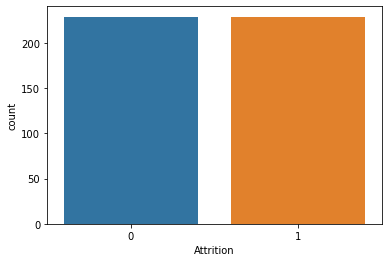

In [2027]:
sns.countplot(under_sample['Attrition'])

In [2028]:
x = under_sample.drop('Attrition', axis = 1)
y = under_sample.Attrition

In [2029]:
#Finding best random state, fitting models and checking for classification metrics

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [dt, gnb, svc, knn, lg]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = accuracy_score(y_test, pred)
        train_score = accuracy_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.005:
            print(i)
            print('At random state ',k)
            print('Accuracy score for train data ', accuracy_score(y_test, pred))
            print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
            print(classification_report(y_test, pred))
            print(confusion_matrix(y_test, pred))
            print('------------------------------------------')

GaussianNB()
At random state  0
Accuracy score for train data  0.7608695652173914
Accuracy score for test data 0.759375
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        68
           1       0.73      0.83      0.78        70

    accuracy                           0.76       138
   macro avg       0.77      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[47 21]
 [12 58]]
------------------------------------------
GaussianNB()
At random state  6
Accuracy score for train data  0.7608695652173914
Accuracy score for test data 0.75625
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        69
           1       0.79      0.71      0.75        69

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[56 13]
 [20 49]]
--------------------------

After undersampling, we were able to increase the f1 scores, and reduce the confusion values for the model.

Hence, we will be cross validating the GaussianNB, Logistic Regression model.

# Cross Validation of the model

In [2030]:
from sklearn.model_selection import cross_val_score

In [2031]:
for i in range(2,9):
    cv = cross_val_score(gnb, x, y, cv=i)
    print(gnb, cv.mean())

GaussianNB() 0.722707423580786
GaussianNB() 0.733631464281619
GaussianNB() 0.733466819221968
GaussianNB() 0.7400382226469183
GaussianNB() 0.7356174527227158
GaussianNB() 0.7400599400599399
GaussianNB() 0.735632183908046


In [2032]:
for i in range(2,9):
    cv = cross_val_score(lg, x, y, cv=i)
    print(lg, cv.mean())

LogisticRegression() 0.6746724890829694
LogisticRegression() 0.6790362343767917
LogisticRegression() 0.7118611746758199
LogisticRegression() 0.6965121834687051
LogisticRegression() 0.689935064935065
LogisticRegression() 0.7118215118215119
LogisticRegression() 0.7138157894736842


Conclusion -

Since Gaussian NB yields a better average score for cross validations and is learning well, we will be using GaussianNB as our final model.

# HyperParameter tuning

We will now try to hypertune our GaussianNB model to check if we are able to improve the accuracy.

In [2033]:
from sklearn.model_selection import GridSearchCV

In [2034]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [2035]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [2036]:
gcv = GridSearchCV(gnb,params)

In [2037]:
res = gcv.fit(x_train,y_train)

In [2038]:
res.best_params_

{'var_smoothing': 8.111308307896856e-09}

In [2039]:
res.best_score_

0.7375

We will use the best params to save our model.

# Saving the best model

In [2040]:
gnb_final = GaussianNB(var_smoothing=1.2328467394420635e-09)

In [2041]:
gnb_final.fit(x_train, y_train)

GaussianNB(var_smoothing=1.2328467394420635e-09)

In [2042]:
pred = gnb_final.predict(x_test)

In [2043]:
print(accuracy_score(y_test, pred))

0.7536231884057971


In [2044]:
print(confusion_matrix(y_test, pred))

[[51 19]
 [15 53]]


In [2045]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        70
           1       0.74      0.78      0.76        68

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138



# AUC ROC curve

In [2046]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = gnb_final.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)


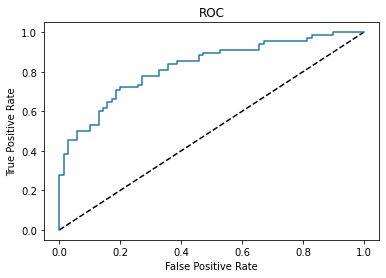

In [2047]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Saving the model

We will now save the model using joblib

In [2048]:
import joblib

In [2049]:
joblib.dump(gnb_final,'hr_attrition.obj')

['hr_attrition.obj']

# Conclusion

We were successfully able to train our model to predict ~70% values correctly, both for attritions as Yes and No.

We chose GaussianNB model as our final model.

In [2050]:
model = joblib.load('hr_attrition.obj')
result = model.predict(x_test)
accuracy_score(y_test,result)

0.7536231884057971

In [2051]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':result})

In [2052]:
#Printing the final result

predicted_values

,Actual,Predicted
788,0,0
134,0,0
136,1,0
151,0,0
981,1,1
...,...,...
1076,0,0
192,1,1
709,1,1
1062,0,0
